In [1]:
# install the package for google colab 
!pip install pylca 

In [2]:
import time 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylca.LCA import LCA

sns.set(style='white', palette='colorblind', context='talk')
np.random.seed(0)
%matplotlib inline 

In [3]:
"""model params
"""
n_units = 3
# input weights
w_input = 1
w_cross = 0
# decision param
leak = 1
self_excit = 1
competition = 1
# logistic function params
bias = -1
gain = 1
# bias term of the LCA
offset = 0
# time step size
dt = .4
# noise
noise_mu = 0
noise_sd = 0

In [4]:
"""set up the input
"""
T = 20
input_pattern_set = list(np.eye(n_units))
stimuli = np.vstack(
    [np.tile(input_pattern, (T, 1)) for input_pattern in input_pattern_set]
)

run_time = 0.006518125534057617


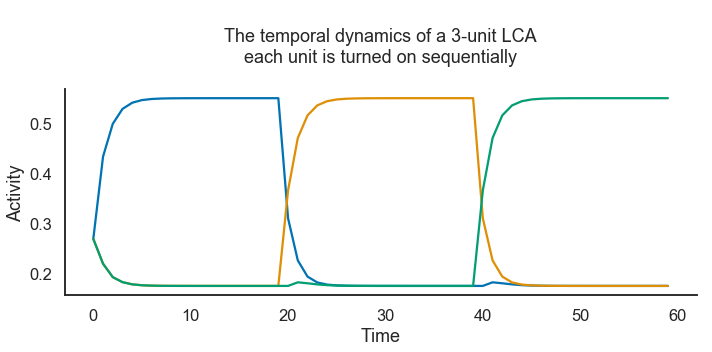

In [5]:
# init LCA
lca = LCA(
    n_units, leak, self_excit, competition, w_input, w_cross,
    offset, bias, gain,
    dt, noise_mu, noise_sd
)
# run LCA
time_begin = time.time()
vals = lca.run(stimuli)
time_end = time.time()
run_time = time_end - time_begin
print(f'run_time = {run_time}')


f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(vals)
title_text = f"""
The temporal dynamics of a {n_units}-unit LCA
each unit is turned on sequentially
"""
ax.set_title(title_text)
ax.set_xlabel('Time')
ax.set_ylabel('Activity')
f.tight_layout()
sns.despine()